# BMW Price prediction

<img src="https://static.bangkokpost.com/media/content/20200305/c1_1872299.jpg" alt="BMW logo" width="800.33" height="200">

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv


# Introduction

Dreaming of having a BMW? Here is your tools to help you select for best value BMW in the market.

Since there are thousands of BMW car on sold online. It might be useful for buyers to understand which independents variables affect price of the car they're going to buy to help them select for most suitable car for there budget. For sellers, ability to set reasonable car price could make thier sale more attractive.



<a class="anchor" id="0.1"></a>

## Table of Contents

1. [Data import and cleaning](#1)
1. [Exploratory Data Analysis](#2)
    - [Univaraite analysis](#2.1)
    - [Bivariate analysis](#2.2)
1. [Data preprocessing](#3)
1. [Models selection](#4)
1. [Hyperparameters tuning](#5)
1. [Prediction and evaluation](#6)
1. [Conclusion](#7)


# 1.  Data import and cleaning <a id = '1'>

## Dataset explanation

Data is provided by 100,000 UK Used car dataset (https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes). For this notebook, we condiser only BMW car which has following features used for prediction of its price

1. model : model of the cars (i.e. 5 Series, X3, etc.)
2. year : year of 1st hand purchased
3. transmission : mode of transmission (manual or automatic or semi-auto)
4. mileage : total mileage of the car
5. tax : road tax incured
6. mpg : miles per gallon consumption
7. engineSize : in units of litres

In [2]:
df = pd.read_csv('../input/used-car-dataset-ford-and-mercedes/bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


Dataset was properly collected. There are no missing value presented. So in data preprocessing step, we can skip imputation process.

To gain further insight, I decide to add new columns to calculate vehicle age from its year since it might be a useful predictor for predict car price

In [4]:
#Age calculation (present year - year of purchased)
df['age'] = 2020 - df['year']
df = df.drop(columns = 'year')
df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,5 Series,11200,Automatic,67068,Diesel,125,57.6,2.0,6
1,6 Series,27000,Automatic,14827,Petrol,145,42.8,2.0,2
2,5 Series,16000,Automatic,62794,Diesel,160,51.4,3.0,4
3,1 Series,12750,Automatic,26676,Diesel,145,72.4,1.5,3
4,7 Series,14500,Automatic,39554,Diesel,160,50.4,3.0,6


In [5]:
#Since there might be error in data gathered (There is petrol and diesel car that have engine size of 0)
df[df['engineSize'] == 0]

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
621,i3,19998,Automatic,41949,Hybrid,140,470.8,0.0,3
778,i3,19998,Automatic,41146,Hybrid,0,470.8,0.0,3
780,i3,21898,Automatic,10839,Hybrid,0,470.8,0.0,3
1866,i3,19980,Automatic,26965,Hybrid,140,470.8,0.0,3
2352,i3,19490,Automatic,8421,Hybrid,0,470.8,0.0,4
3277,i3,16482,Automatic,43695,Hybrid,0,470.8,0.0,4
3628,i3,14285,Automatic,65800,Hybrid,0,470.8,0.0,5
3913,i3,18500,Automatic,36429,Hybrid,0,470.8,0.0,3
4100,i3,19495,Automatic,17338,Hybrid,135,470.8,0.0,3
4109,i3,17481,Automatic,9886,Hybrid,0,470.8,0.0,5


In [6]:
#Let's drop instances which fuelType are Diesel or Petrol but have 0.0 engineSize out.
df = df.drop(df[(df['engineSize'] == 0) & (df['fuelType'].isin(['Diesel','Petrol']))].index)
df[df['engineSize'] == 0]

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
621,i3,19998,Automatic,41949,Hybrid,140,470.8,0.0,3
778,i3,19998,Automatic,41146,Hybrid,0,470.8,0.0,3
780,i3,21898,Automatic,10839,Hybrid,0,470.8,0.0,3
1866,i3,19980,Automatic,26965,Hybrid,140,470.8,0.0,3
2352,i3,19490,Automatic,8421,Hybrid,0,470.8,0.0,4
3277,i3,16482,Automatic,43695,Hybrid,0,470.8,0.0,4
3628,i3,14285,Automatic,65800,Hybrid,0,470.8,0.0,5
3913,i3,18500,Automatic,36429,Hybrid,0,470.8,0.0,3
4100,i3,19495,Automatic,17338,Hybrid,135,470.8,0.0,3
4109,i3,17481,Automatic,9886,Hybrid,0,470.8,0.0,5


# 2.  Exploratory Data Analysis <a id='2'>

There are 10781 instances of data. Total number of attributes are 9, of which 5 is quantitative, 3 is Qualitative.

Quantitative: mileage, tax, mpg, engineSize, age

Qualitative: model, transimission, fuelType

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10769 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10769 non-null  object 
 1   price         10769 non-null  int64  
 2   transmission  10769 non-null  object 
 3   mileage       10769 non-null  int64  
 4   fuelType      10769 non-null  object 
 5   tax           10769 non-null  int64  
 6   mpg           10769 non-null  float64
 7   engineSize    10769 non-null  float64
 8   age           10769 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 841.3+ KB


In [8]:
cat_col = df.select_dtypes(include = object).columns.tolist()
num_col = df.select_dtypes(exclude = object).columns.tolist()

## 2.1 Univaraiate analysis <a id = '2.1'>

In [9]:
df.describe()

,price,mileage,tax,mpg,engineSize,age
count,10769.000000,10769.000000,10769.000000,10769.000000,10769.000000,10769.000000
mean,22739.598199,25497.072987,131.684000,56.393156,2.170183,2.919398
std,11417.842159,25155.592279,61.370126,31.351438,0.547595,2.345011
min,1200.000000,1.000000,0.000000,5.500000,0.000000,0.000000
25%,14950.000000,5524.000000,135.000000,45.600000,2.000000,1.000000
50%,20480.000000,18327.000000,145.000000,53.300000,2.000000,3.000000
75%,27947.000000,38218.000000,145.000000,62.800000,2.000000,4.000000
max,123456.000000,214000.000000,580.000000,470.800000,6.600000,24.000000


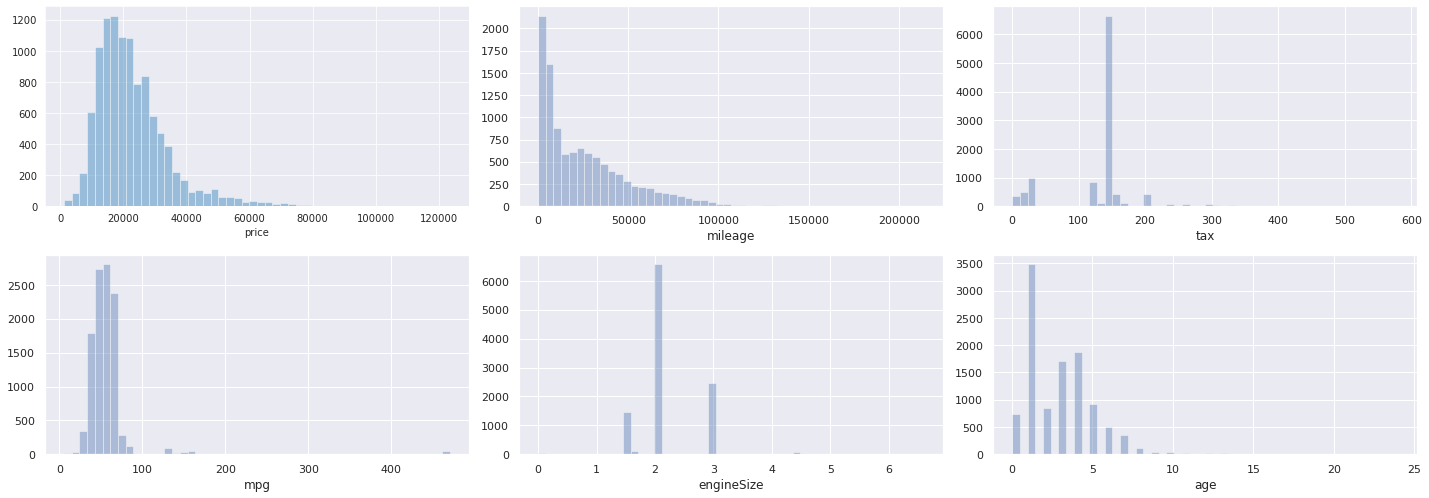

In [10]:
#numerical data
fig = plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
for index,col in enumerate(num_col):
    plt.subplot(3,3,index+1)
    sns.set(font_scale = 1.0)
    sns.distplot(df[col], kde = False)
fig.tight_layout(pad=1.0)

Data observation : 
1. Price distribution are right skew which has mean around 22800 and median around 20500
1. Mileage distribution are right skew with most of them are under 50,000 miles of usage
1. Tax distribution : most of our data are fixed value at 145
1. mpg are neary normal distribution with mean and median of 56.4 and 53 and some outlier above 100 mpg
1. age are lying from new cars to oldest of 24 years old which has mean and median around 3 years old

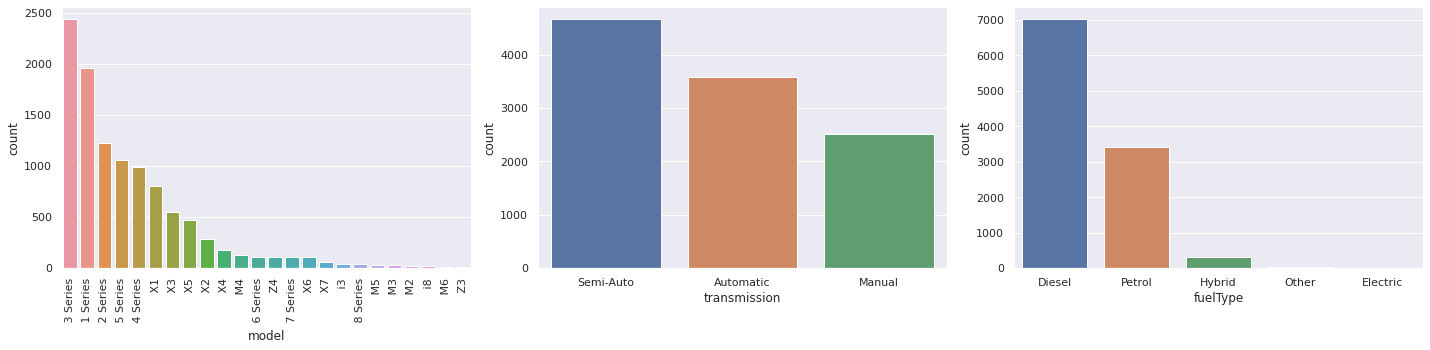

In [11]:
#Categorical feature
fig = plt.figure(figsize=(20,5))
sns.set_style('darkgrid')
for index,col in enumerate(cat_col):
    plt.subplot(1,3,index+1)
    if(index == 0):
        plt.xticks(rotation=90)
    sns.set(font_scale = 1.0)
    sns.countplot(df[col], order = df[col].value_counts().index)

    
fig.tight_layout(pad=1.0)

Data observation
1. More than 50% of BMW on sold in our database are BMW 1 Series - 5 Series which are displayed above
2. Semi automatic transmission is the most popular following by automatic and manual transmission
3. 70% of them are Diesel powered following by petrol , hybrid and electric

## 2.2 Bivariate Analysis <a id = '2.2'>

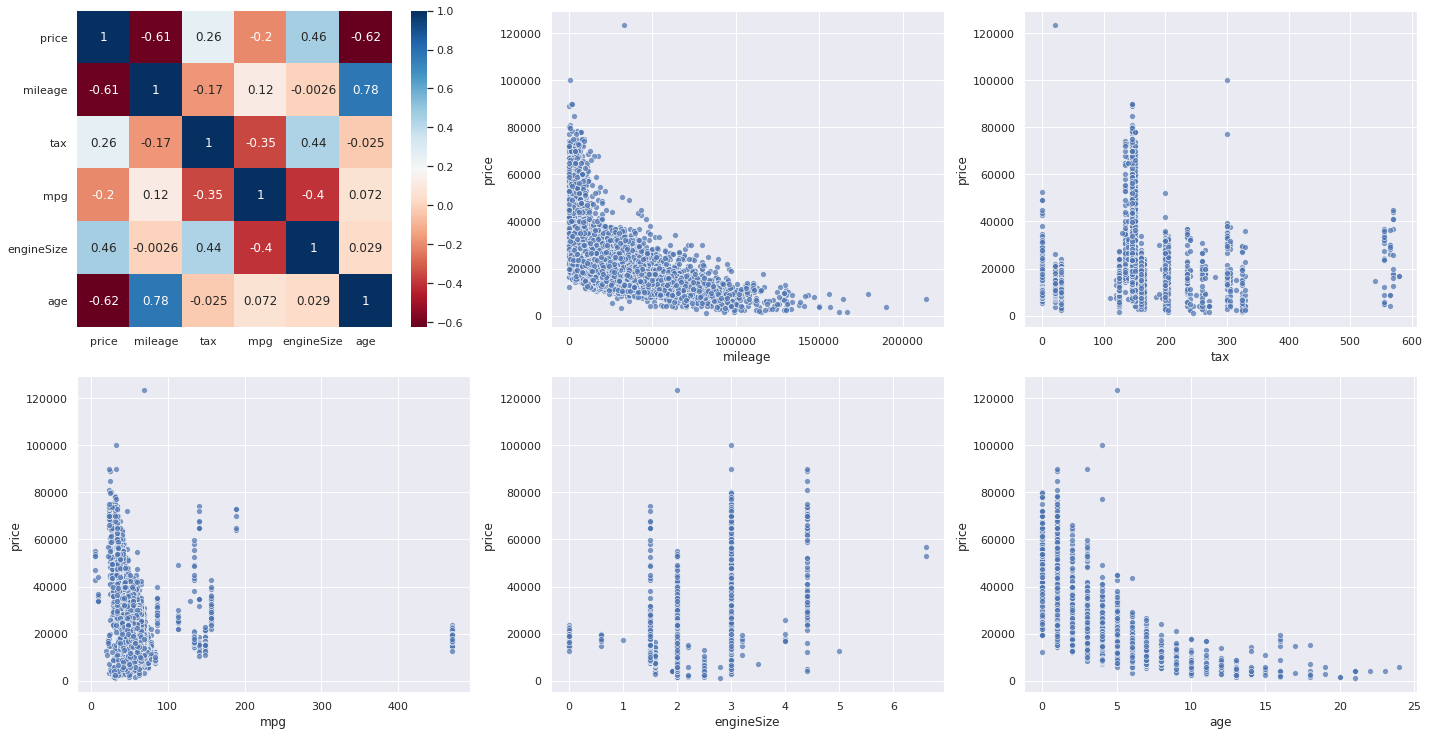

In [12]:
#numerical data
fig = plt.figure(figsize=(20,20))
sns.set_style('darkgrid')
for index,col in enumerate(num_col):
    if col == 'price':
        plt.subplot(4,3,index+1)
        sns.heatmap(df.corr(), annot=True, cmap='RdBu')
    else:
        plt.subplot(4,3,index+1)
        sns.set(font_scale = 1.0)
        sns.scatterplot(data = df, x = col, y = 'price',alpha = 0.7)
fig.tight_layout(pad=1.0)

Data observation :
1. Mileage and age show strong negative corelation against price (It would be important predictor of price)
1. Tax and mpg show weak relationship with price
1. As engineSize grow up, car price tend to go up

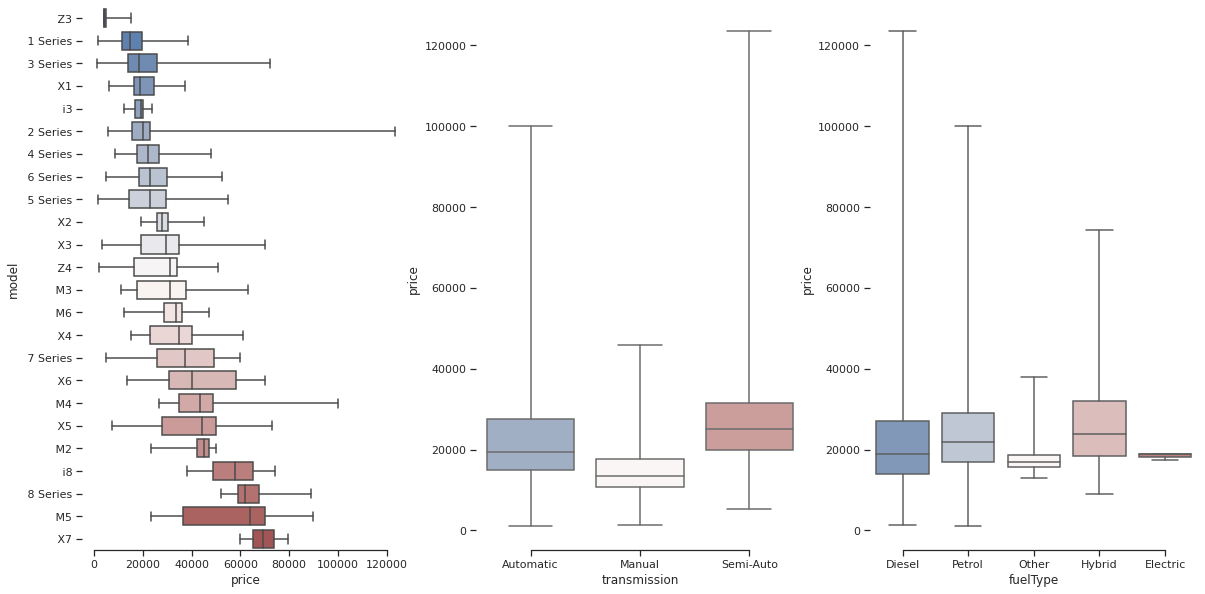

In [13]:
sns.set(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(20, 10))

# Plot model vs price
plt.subplot(1,3,1)
sns.boxplot(x="price", y="model", data=df,
            whis=[0, 100], palette="vlag",
           order = df.groupby('model').median().sort_values(by = 'price').index)
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)

# Plot transmission vs price
plt.subplot(1,3,2)
sns.boxplot(x="transmission", y="price", data=df,
            whis=[0, 100], palette="vlag")
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)

# Plot fuelType vs price
plt.subplot(1,3,3)
sns.boxplot(x="fuelType", y="price", data=df,
            whis=[0, 100], palette="vlag")

ax.xaxis.grid(True)
sns.despine(trim=True, left=True)

Data observation :
1. Different model demonstrate different variation in price as show
1. Semi-automatic transmission tend to slightly higher price than automatic and manual transmission
1. Fuel type doesn't show strong relationship with price (However Hybrid tend to have a little bit higher price than other type)

# 3. Data preprocessing <a id = '3'>

Since our features can be separated into 2 group, we'll have different preprocessing step for them as follow.
1. **Numerical features** : since there's no missing value for imputation, our preprocessing step will consist of just standardize them
2. **Categorical features** : perform one hot encoding on them before feeding into model



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [15]:
X = df.copy().drop(columns='price')
y = df['price'].copy()
#Before further dealing with data, let's split it into train and test set , since we'll not use test set for model development (for evaluating model performance only).
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1, test_size = 0.2)

In [16]:
#Separate different attribute type to catergorical and numerical features.
cat_col = ['model', 'transmission', 'fuelType']
num_col = ['mileage', 'tax', 'mpg', 'age','engineSize']

In [17]:
#For numberical features, let's standardized it before feeding into our model
#For categorical features, perform one hot encoding before feeding into model
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_col),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
])

In [18]:
#Apply data transformation to train set
X_train_prepared = full_pipeline.fit_transform(X_train)

In [104]:
#X_train_prepared
pd.DataFrame.sparse.from_spmatrix(X_train_prepared,columns = full_pipeline.transformers_[0][2]+full_pipeline.transformers_[1][1].get_feature_names().tolist()  )

,mileage,tax,mpg,age,engineSize,x0_ 1 Series,x0_ 2 Series,x0_ 3 Series,x0_ 4 Series,x0_ 5 Series,...,x0_ i3,x0_ i8,x1_Automatic,x1_Manual,x1_Semi-Auto,x2_Diesel,x2_Electric,x2_Hybrid,x2_Other,x2_Petrol
0,-0.814340,0.213982,-0.462461,-0.814802,-0.314837,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.794524,0.213982,-0.462461,-0.814802,-1.227709,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.269159,-2.133546,0.597114,0.878995,-0.314837,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.166652,-1.809749,0.474983,0.455546,-1.227709,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.375446,0.213982,-0.218198,0.032097,1.510905,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8610,-0.937004,0.213982,-0.399745,-1.238251,-1.227709,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8611,-0.950479,0.213982,0.128392,-0.814802,-0.314837,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8612,-0.210613,-1.647851,0.217516,0.455546,-0.314837,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8613,0.272393,0.213982,-0.026748,0.032097,-0.314837,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0



# 4. Model selection <a id = '4'>


There is tons of regression algorithm availble. we'll explore some of them using default setting of each algorithm provided by scikit-learn library and evaluate there performance using cross-validation method. 

After we got best model, we'll continue fine tune them to increase its performance on validation set. 

Finally we'll evaluate model performance on test set which we hold it out before our data preprocessing step.

In [19]:
model_list = [(ElasticNet(),'ElasticNet'),
              (SGDRegressor(),'SGDRegressor'),
              (SVR(kernel='linear'),'SVR-linear'),
              (SVR(kernel='rbf'),'SVR-rbf'),
              (RandomForestRegressor(),'RandomForestRegressor'),
              (xgb.XGBRegressor(),'XGBoost')
             ]

model_score = []

for m in model_list:
    model = m[0]
    score = cross_val_score(model,X_train_prepared,y_train,cv=4, scoring='r2')
    print(f'{m[1]} score = {score.mean()}')
    model_score.append([m[1],score.mean()])

ElasticNet score = 0.6343921255496863
SGDRegressor score = 0.8580421641017479


KeyboardInterrupt: 

from cross validation score, we decide to continue develop on **XGBoost** model since it has highest score on validation set.

# 5. Hyperparameter tuning <a id=5>

In this step, we will continue to develop our XGBoost regressor to achieve better performance on validation set by **GridSearchCV** method. <br> For short brief, GridSearchCV will go through every combination of hyperparameter listed in param_grid. In our case GridSearchCV will go through total of 3x3x5x5x3 = 675 models to find best combination of hyperparameters. 

Note : <br>In each models GridSearchCV will run cross validation with 4 folds 

In [ ]:
from sklearn.model_selection import GridSearchCV

#Hyperparameter to be tweaked
param_grid = [
    {'n_estimators': [100,200,300],
    'max_depth' : [3,5,10],
    'reg_lambda' : [0.1,1,3,10,30],
    'reg_alpha': [0.1,1,3,10,30],
    'learning_rate': [0.15,0.3,0.5]}
]

xgb_regressor = xgb.XGBRegressor()
grid_search = GridSearchCV(xgb_regressor,param_grid, cv=4, scoring = 'r2', return_train_score = True)

In [ ]:
grid_search.fit(X_train_prepared,y_train)

In [ ]:
#Save model for later use
model = grid_search.best_estimator_
joblib.dump(model , 'XGBRegressor.pkl')

In [23]:
my_model = joblib.load('../input/bmw-price-prediction/XGBRegressor.pkl')

# 6. Prediction and evaluation <a id=6>

Now it's time to make a prediction from our model

In [75]:
# Apply preprocessing to test set
X_test_prepared = full_pipeline.transform(X_test)
# Fit model to training set
my_model.fit(X_train_prepared,y_train)
prediction = my_model.predict(X_test_prepared)

In [87]:
#Result of model's prediction (y_predicted) compared to actual car price (y_test)
np.random.seed(0)
compare = pd.DataFrame(data = [np.array(y_test),prediction])
compare = compare.T
compare.columns = ['Actual_price','Predicted_price']
compare.sample(10)

,Actual_price,Predicted_price
1924,20980.0,21309.617188
1952,11545.0,11446.290039
393,23850.0,25312.927734
156,14490.0,14461.642578
1604,15200.0,14151.049805
314,15950.0,17786.527344
2118,10100.0,10305.186523
457,52995.0,48228.191406
1881,10650.0,9183.891602
1063,7492.0,9852.482422


from above table, Our model have done pretty good! <br>
Let's visualize how good our model make a prediction compared to actual car price

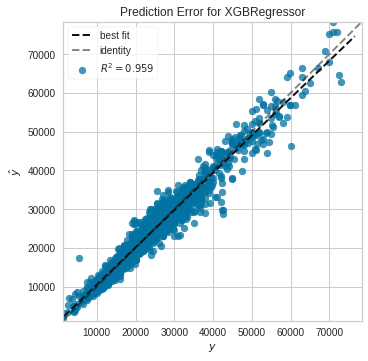

In [77]:
from yellowbrick.regressor import prediction_error
# Create the train and test data
# Instantiate the linear model and visualizer
visualizer = prediction_error(my_model, X_train_prepared, y_train, X_test_prepared, y_test)

With vertical axis as predicted price and horizontal axis as actual price,
Ideally, model with 100% accuracy will perform as gray dashed line (predicted price = actual price) with slope equal to one.<br>

In our case, our XGBRegressor model perform quite good with Rsquared of 0.959 

# 7. Conclusion <a id=7>

In [115]:
importance = pd.DataFrame(data=my_model.feature_importances_, index = full_pipeline.transformers_[0][2]+full_pipeline.transformers_[1][1].get_feature_names().tolist(),columns=['Importance_Score'])
importance.sort_values(by='Importance_Score',ascending=False)


,Importance_Score
engineSize,0.301619
age,0.149834
x0_ 1 Series,0.050947
x0_ i8,0.050131
x1_Manual,0.043854
x0_ X7,0.042727
x0_ X5,0.040394
x0_ X3,0.034781
x2_Petrol,0.032175
x0_ 2 Series,0.031173


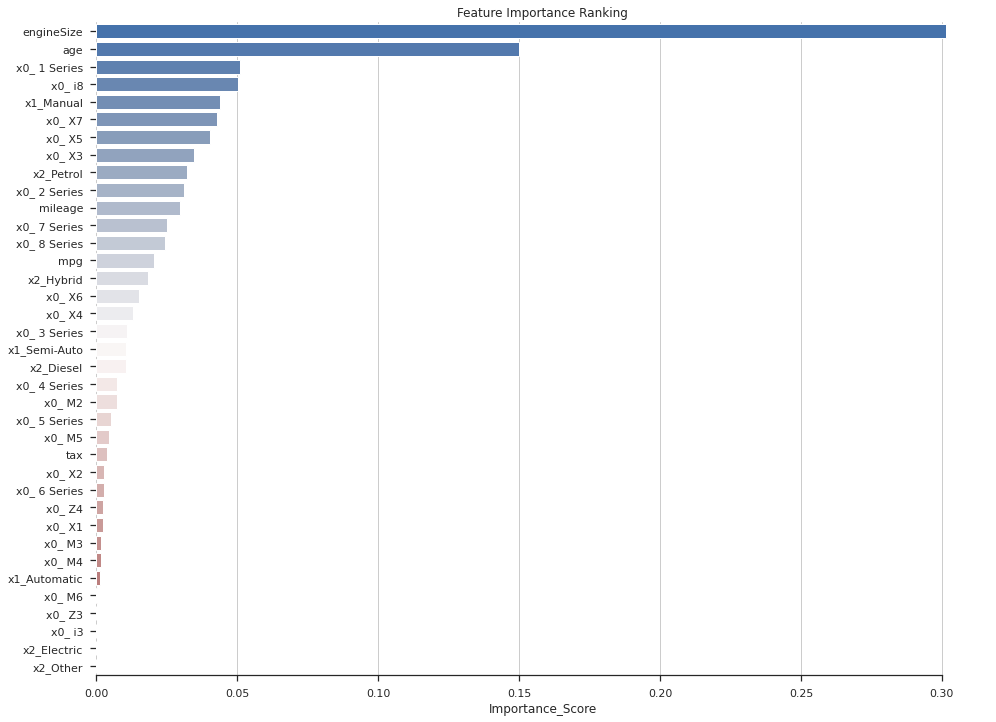

In [127]:
sns.set(style="ticks")

# Initialize the figure
f, ax = plt.subplots(figsize=(16, 12))

sns.barplot(x = 'Importance_Score', y=importance.index, data=importance,
           order = importance.sort_values(by='Importance_Score',ascending=False).index,
            palette="vlag")
           
ax.xaxis.grid(True)
ax.set_title('Feature Importance Ranking')
sns.despine(trim=True, left=True)

In conclusion, factors which have strong effect to BMW car price are as follow
* engineSize : which increasing in engineSize directly cause increasing in price as our observation in exploratory data analysis shown
* Age and mileage : older vehicle depreciated in its value which result in lower price compared to newer one. However age is better predictor than mileage although they have same corelation with price. For next model it might be worth a try to eliminate mileage from our model, since it relevant to age attribute.
* Different model : diffrent car model are important than the rest attributes, since different model have different price from their day 1 out of factory

Out of 6 model in our list, XGBRegressor performance are outstanding with R2 on test set of 0.959

### **Here come to the end of this notebook, please note that this is the first regression problem solving for me, I'll try with more challenging dataset and algorithm in next problem. I have to apologize for any mistakes made here. I would greatly appreciate it if you kindly give me some feedback for this notebook. If you like it, please hit upvote! :D**

[back to top](#0.1)